# Corridor Travel Times

### Define 2 comparison scenario locations

In [158]:
scen1_loc = r'S:\brice\soundcast_2040_feb17_17'
scen2_loc = r'S:\brice\soundcast_2040_feb17_17'

current_run_name = 'soundcast_2014'
scen1_name = 'plan_2040'
scen2_name = 'plan_2040_2'

In [159]:
import os
import pandas as pd
import h5py
%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Link Travel Times

In [160]:
# corridors using .in files

run_df = pd.read_excel(r'..\..\..\outputs\network_summary_detailed.xlsx', sheetname='Corridors').drop('length', axis=1)
scen1_df = pd.read_excel(os.path.join(scen1_loc,r'outputs\network_summary_detailed.xlsx'), sheetname='Corridors').drop('length', axis=1)
scen2_df = pd.read_excel(os.path.join(scen2_loc,r'outputs\network_summary_detailed.xlsx'), sheetname='Corridors').drop('length', axis=1)

In [161]:
# merge scenarios 
df = pd.merge(run_df, scen1_df, on=['Corridor Input File','Local ID','full_id','tod'], suffixes=['_'+current_run_name, '_'+scen1_name])
df.rename(columns={'auto_time_'+current_run_name:current_run_name,'auto_time_'+scen1_name:scen1_name}, inplace=True)
df = pd.merge(df, scen2_df, on=['Corridor Input File','Local ID','full_id','tod'])
df.rename(columns={'auto_time':scen2_name}, inplace=True)

df[['Local ID','full_id']] = df[['Local ID','full_id']].astype('int')

In [162]:
# Merge with observed
obs = pd.read_csv(r'..\..\..\scripts\summarize\inputs\network_summary\corridor_travel_times.csv')
df = pd.merge(df,obs,left_on=['Corridor Input File','Local ID','tod'], right_on=['corridor','direction_id','tod'])

### Model vs observed

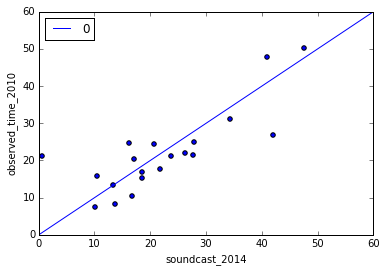

In [163]:
model_run = current_run_name

# For validation
import matplotlib.pyplot as plt
maxtime = 60
ax = df.plot(kind='scatter', x=model_run, y='observed_time_2010', xlim=[0,maxtime], ylim=[0,maxtime])

# reference line 
ref = pd.DataFrame([0,maxtime],[0,maxtime])
ref.plot(ax=ax)

### Run vs Scenario

In [164]:
# Set comparison scenario:
compare_scen = scen1_name

In [165]:
compare_df = df[[current_run_name,compare_scen]]
compare_df.index = df.description
compare_df['Change (minutes)'] = compare_df[compare_scen] - compare_df[current_run_name]
compare_df['% Change'] = (compare_df[compare_scen] - compare_df[current_run_name])/compare_df[current_run_name]
compare_df

,soundcast_2014,plan_2040,Change (minutes),% Change
description,,,,
Seattle to Everett via I-5,42.034000,38.480593,-3.553407,-0.084537
Everett to Seattle via I-5,63.659705,52.183314,-11.476392,-0.180277
Federal Way to Seattle via I-5,47.464196,44.785897,-2.678299,-0.056428
Seattle to Federal Way via I-5,27.769661,26.723916,-1.045745,-0.037658
Bellevue to Lynnwood via I-405,21.670139,22.490823,0.820684,0.037872
Lynnwood to Bellevue via I-405,40.883362,38.709404,-2.173958,-0.053175
Tukwila to Bellevue via I-405,34.288670,25.175834,-9.112836,-0.265768
Bellevue to Tukwila via I-405,26.206000,19.773659,-6.432341,-0.245453
Auburn to Renton via SR 167,23.763551,27.468212,3.704662,0.155897


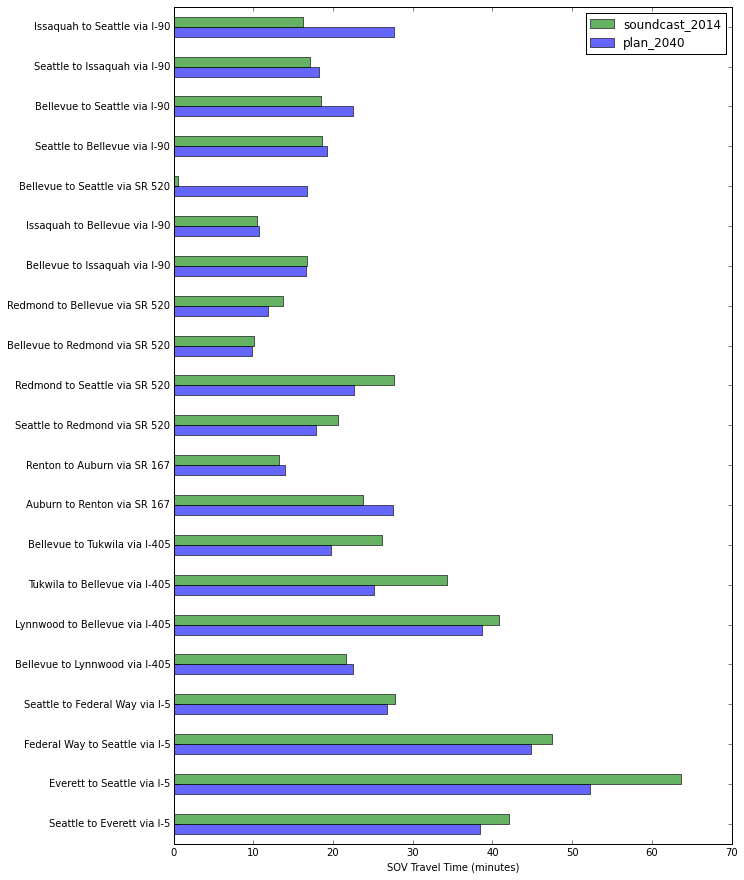

In [166]:
df.index = df.description
ax = df[[compare_scen,current_run_name]].plot(kind='barh', figsize=(10,15), alpha=0.6)

# Change order of labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')  # reverse both handles and labels
ax.yaxis.label.set_visible(False)    # hide y axis labels
ax.set_xlabel('SOV Travel Time (minutes)')

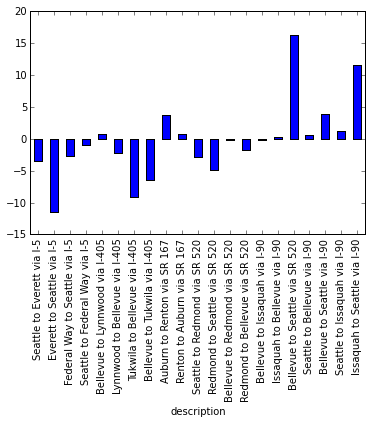

In [167]:
compare_df['Change (minutes)'].plot(kind='bar')

# O-D Corridor

In [168]:
# Load observed data (2017)
od_obs = pd.read_csv(r'..\..\..\scripts\summarize\inputs\network_summary\od_travel_times.csv')

In [169]:
skim_name = '7to8'
user_class = 'svtl1t'
scen_name = '2014'
max_internal_zone = 3700
zone_list = [532,1552,1356]
results = pd.DataFrame()
run_dict = {'run': current_run_name,
            scen1_loc: scen1_name}

for run_dir, current_run_name in run_dict.iteritems():
    skims_dir = run_dir + r'\inputs'
    if run_dir == 'run':
        h5_contents = h5py.File(r'..\..\..\inputs' + r'\\' + skim_name + '.h5')
    else:
        h5_contents = h5py.File(skims_dir + r'\\' + skim_name + '.h5')
    for zone in zone_list:
        df = pd.DataFrame()
        df[user_class] = h5_contents['Skims'][user_class][:][zone-1,:max_internal_zone]
        df['otaz'] = zone
        df['dtaz'] = df.index+1
        df['travel_time'] = df[user_class]/100 # skim data is stored in hundreds
        
#      Subtract the terminal times
    #     df = pd.merge(df,o_tt,left_on='dtaz',right_on='taz')
    #     # Subtract destination terminal time
    #     df['travel_time'] = df['travel_time']-df['terminal_time']
    #     # Subtract origin terminal time
    #     df['travel_time'] = df['travel_time']-(o_tt[o_tt['taz'] == origin_zone]['terminal_time'].values[0])
        
        df = df[df['dtaz'].isin(zone_list)]
        
        df['source'] = current_run_name
        results = results.append(df)

In [170]:
scen1 = results[results['source'] == current_run_name][['travel_time','otaz','dtaz']]
scen2 = results[results['source'] == scen1_name][['travel_time','otaz','dtaz']]

df = pd.merge(scen1, scen2, on=['otaz','dtaz'], suffixes=["_"+current_run_name,"_"+scen1_name])
df.rename(columns={"travel_time_"+current_run_name:current_run_name,"travel_time_"+scen1_name:scen1_name}, inplace=True)

df = pd.merge(df, od_obs[['otaz','dtaz','description','time_cong']], on=['otaz','dtaz'])
df.index = df['description']
df.rename(columns={'time_cong':'observed'},inplace=True)
df

,soundcast_2014,otaz,dtaz,plan_2040,description,observed
description,,,,,,
Seattle-Renton,28.02,532,1356,30.71,Seattle-Renton,17.716667
Seattle-Bellevue,25.54,532,1552,30.25,Seattle-Bellevue,14.533333
Bellevue-Seattle,24.65,1552,532,32.93,Bellevue-Seattle,13.950000
Bellevue-Renton,21.09,1552,1356,20.72,Bellevue-Renton,13.550000
Renton-Seattle,32.89,1356,532,37.60,Renton-Seattle,17.233333
Renton-Bellevue,28.96,1356,1552,28.72,Renton-Bellevue,14.500000


## AM Travel Times

In [171]:
df[['description',current_run_name,scen1_name]]

,description,soundcast_2014,plan_2040
description,,,
Seattle-Renton,Seattle-Renton,28.02,30.71
Seattle-Bellevue,Seattle-Bellevue,25.54,30.25
Bellevue-Seattle,Bellevue-Seattle,24.65,32.93
Bellevue-Renton,Bellevue-Renton,21.09,20.72
Renton-Seattle,Renton-Seattle,32.89,37.60
Renton-Bellevue,Renton-Bellevue,28.96,28.72


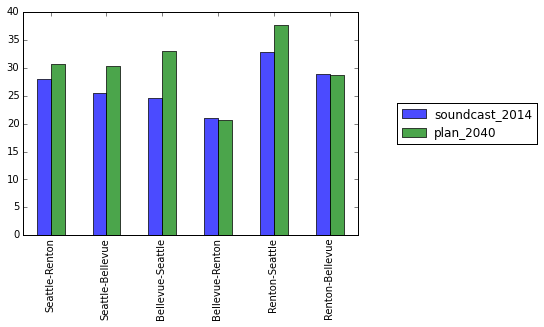

In [172]:
ax = df[[current_run_name,scen1_name]].plot(kind='bar', alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_xlabel("")

## Travel Times Today
note that itrazonal times should be subtracted for accurate comparison

In [173]:
df[[current_run_name,scen1_name,'observed']]

,soundcast_2014,plan_2040,observed
description,,,
Seattle-Renton,28.02,30.71,17.716667
Seattle-Bellevue,25.54,30.25,14.533333
Bellevue-Seattle,24.65,32.93,13.950000
Bellevue-Renton,21.09,20.72,13.550000
Renton-Seattle,32.89,37.60,17.233333
Renton-Bellevue,28.96,28.72,14.500000


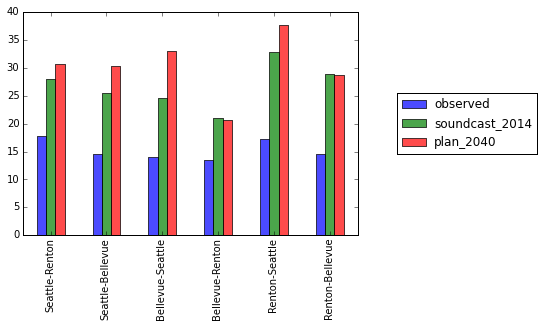

In [174]:
ax = df[['description','observed',current_run_name,scen1_name]].plot(kind='bar', alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
ax.set_xlabel("")